In [1]:
#loading libraries
library(RColorBrewer)
library(dplyr)
library(plyr)
library(ggplot2)
library(monocle)
library(reshape2)
library(scales)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Loading required package: Matrix

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall,

In [2]:
monocle_theme_opts <- function()
{
    theme(strip.background = element_rect(colour = 'white', fill = 'white')) +
    theme(panel.border = element_blank()) +
    theme(axis.line.x = element_line(size=0.25, color="black")) +
    theme(axis.line.y = element_line(size=0.25, color="black")) +
    theme(panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank()) +
    theme(panel.grid.major.x = element_blank(), panel.grid.major.y = element_blank()) + 
    theme(panel.background = element_rect(fill='white')) +
    theme(legend.key=element_blank())
}

Cells were aligned to mouse genome build mm10, and normalized to get FPKM values for all genes. There are 52,545 different gene annotations and 192 cells. First we make 3 different structures holding all of the information on our cells/genes/expression levels. Our phenotype data (pd) is in the sample table, which tells about each cell that was sequenced. Our feature data (fd) is in our gene table, which tells about the genes we alligned our reads to. The expression matrix is in an fpkm table, which has FPKM values for every gene for each cell.

In [3]:
sample_sheet1=read.delim("/net/gs/vol1/home/ame18/Projects/NGS_BuckLab/FPKM_data/2017.11.03.BuckLab/mm10/samples.table")
fpkm_matrix1=read.table("/net/gs/vol1/home/ame18/Projects/NGS_BuckLab/FPKM_data/2017.11.03.BuckLab/mm10/genes.fpkm_table",header=TRUE)
gene_annotations1=read.delim("/net/gs/vol1/home/ame18/Projects/NGS_BuckLab/FPKM_data/2017.11.03.BuckLab/mm10/genes.attr_table")
sample_sheet1$exp=1

In [4]:
pr_sample_sheet1=read.delim("/net/gs/vol1/home/ame18/Projects/NGS_BuckLab/FPKM_data/2017.11.03.BuckLab/Pseudorabies/samples.table")
pr_fpkm_matrix=read.table("/net/gs/vol1/home/ame18/Projects/NGS_BuckLab/FPKM_data/2017.11.03.BuckLab/Pseudorabies/genes.fpkm_table")
pr_gene_annotations1=read.delim("/net/gs/vol1/home/ame18/Projects/NGS_BuckLab/FPKM_data/2017.11.03.BuckLab/Pseudorabies/genes.attr_table")

sample_sheet1$pr=pr_sample_sheet1$total_mass


Changing the row names of the fpkm_matrix and gene annotations to be the tracking id. 
Changing the row names of the sample sheet to be the sample id. 
Then, double checking by making sure that they are all the same. 

In [5]:
sample_sheet3=read.delim("/net/gs/vol1/home/ame18/Projects/NGS_BuckLab/FPKM_data/2017.12.06.buckLab/171130_Mouse/samples.table")
fpkm_matrix3=read.table("/net/gs/vol1/home/ame18/Projects/NGS_BuckLab/FPKM_data/2017.12.06.buckLab/171130_Mouse/genes.fpkm_table",header=TRUE)
gene_annotations3=read.delim("/net/gs/vol1/home/ame18/Projects/NGS_BuckLab/FPKM_data/2017.12.06.buckLab/171130_Mouse/genes.attr_table")
sample_sheet3$exp=3

In [6]:
pr_sample_sheet3=read.delim("/net/gs/vol1/home/ame18/Projects/NGS_BuckLab/FPKM_data/2017.12.06.buckLab/171130_Pseudorabies/samples.table")
pr_fpkm_matrix3=read.table("/net/gs/vol1/home/ame18/Projects/NGS_BuckLab/FPKM_data/2017.12.06.buckLab/171130_Pseudorabies/genes.fpkm_table")
pr_gene_annotations3=read.delim("/net/gs/vol1/home/ame18/Projects/NGS_BuckLab/FPKM_data/2017.12.06.buckLab/171130_Pseudorabies/genes.attr_table")

sample_sheet3$pr=pr_sample_sheet3$total_mass

In [7]:
sample_sheet2=read.delim("/net/gs/vol1/home/ame18/Projects/NGS_BuckLab/FPKM_data/2017.12.06.buckLab/171102_Mouse/samples.table")
fpkm_matrix2=read.table("/net/gs/vol1/home/ame18/Projects/NGS_BuckLab/FPKM_data/2017.12.06.buckLab/171102_Mouse/genes.fpkm_table",header=TRUE)
gene_annotations2=read.delim("/net/gs/vol1/home/ame18/Projects/NGS_BuckLab/FPKM_data/2017.12.06.buckLab/171102_Mouse/genes.attr_table")
sample_sheet2$exp=2

In [8]:
pr_sample_sheet2=read.delim("/net/gs/vol1/home/ame18/Projects/NGS_BuckLab/FPKM_data/2017.12.06.buckLab/171102_Pseudorabies/samples.table")
pr_fpkm_matrix2=read.table("/net/gs/vol1/home/ame18/Projects/NGS_BuckLab/FPKM_data/2017.12.06.buckLab/171102_Pseudorabies/genes.fpkm_table",header=TRUE)
pr_gene_annotations2=read.delim("/net/gs/vol1/home/ame18/Projects/NGS_BuckLab/FPKM_data/2017.12.06.buckLab/171102_Pseudorabies/genes.attr_table")

sample_sheet2$pr=pr_sample_sheet2$total_mass


In [9]:
list2=289:384
list2=paste("q",list2, "_0", sep="")
list3=385:480
list3=paste("q",list3, "_0", sep="")
sample_sheet2$sample_id=list2
sample_sheet3$sample_id=list3
colnames(fpkm_matrix2)=c("tracking_id",list2)
colnames(fpkm_matrix3)=c("tracking_id",list3)

In [10]:
sample_sheet_merge=merge(sample_sheet1,sample_sheet2,by=c("sample_id","file","total_mass","internal_scale","external_scale","exp","pr"), all.x=TRUE, all.y=TRUE)
sample_sheet_merge=merge(sample_sheet_merge,sample_sheet3,by=c("sample_id","file","total_mass","internal_scale","external_scale","exp","pr"), all.x=TRUE, all.y=TRUE)
fpkm_matrix_merge=join(fpkm_matrix1,fpkm_matrix2,type="left", match="all")
fpkm_matrix_merge=join(fpkm_matrix_merge,fpkm_matrix3,type="left", match="all")
gene_annotations_merge=join(gene_annotations1,gene_annotations2,type="left", match="all")
gene_annotations_merge=join(gene_annotations_merge,gene_annotations3,type="left", match="all")

Joining by: tracking_id

Joining by: tracking_id

Joining by: tracking_id, class_code, nearest_ref_id, gene_id, gene_short_name, tss_id, locus, length

Joining by: tracking_id, class_code, nearest_ref_id, gene_id, gene_short_name, tss_id, locus, length



In [11]:
dim(sample_sheet_merge)
dim(fpkm_matrix_merge)
dim(gene_annotations_merge)

[1] 384   7

[1] 52545   385

[1] 52545     8

In [12]:
row.names(fpkm_matrix_merge) <- fpkm_matrix_merge$tracking_id
fpkm_matrix_merge$tracking_id <- NULL
row.names(sample_sheet_merge) <- sample_sheet_merge$sample_id

In [13]:
sample_sheet_merge=sample_sheet_merge[colnames(fpkm_matrix_merge),]


In [14]:
row.names(gene_annotations_merge) <- gene_annotations_merge$tracking_id

In [15]:
sum(row.names(fpkm_matrix_merge) != row.names(gene_annotations_merge))
sum(colnames(fpkm_matrix_merge) != row.names(sample_sheet_merge))

[1] 0

[1] 0

Making the phenotype data and feature data variables from the sample sheet and the gene annoations

In [16]:
fpkm_matrix=fpkm_matrix_merge
sample_sheet=sample_sheet_merge
gene_annotations=gene_annotations_merge

In [17]:
fpkm_matrix_np=fpkm_matrix

In [18]:
fpkm_matrix[1,which(fpkm_matrix[1,]>0)]

,q1_0,q4_0,q5_0,q14_0,q57_0,q58_0,q59_0,q63_0,q72_0,q77_0,⋯,q457_0,q459_0,q460_0,q465_0,q467_0,q468_0,q470_0,q471_0,q477_0,q479_0
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000000001.4,61.714,69.8781,11.7371,4.177,70.7159,0.574283,0.644965,0.952525,27.8556,2.93307,⋯,0.282798,442.355,3.49653,0.552456,105.085,0.385328,28.4083,16.5067,29.7938,4.35283


In [19]:
fpkm_matrix[fpkm_matrix < .1] <- 0

In [20]:
head(fpkm_matrix)

,q1_0,q2_0,q3_0,q4_0,q5_0,q6_0,q7_0,q8_0,q9_0,q10_0,⋯,q471_0,q472_0,q473_0,q474_0,q475_0,q476_0,q477_0,q478_0,q479_0,q480_0
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000000001.4,61.714,0,0,69.8781,11.7371,0,0,0,0,0,⋯,16.5067,0,0,0,0,0,29.7938,0,4.35283,0
ENSMUSG00000000003.15,0.000,0,0,0.0000,0.0000,0,0,0,0,0,⋯,0.0000,0,0,0,0,0,0.0000,0,0.00000,0
ENSMUSG00000000028.14,0.000,0,0,0.0000,0.0000,0,0,0,0,0,⋯,0.0000,0,0,0,0,0,0.0000,0,0.00000,0
ENSMUSG00000000031.15,0.000,0,0,0.0000,0.0000,0,0,0,0,0,⋯,0.0000,0,0,0,0,0,0.0000,0,0.00000,0
ENSMUSG00000000037.16,0.000,0,0,0.0000,0.0000,0,0,0,0,0,⋯,0.0000,0,0,0,0,0,0.0000,0,0.00000,0
ENSMUSG00000000049.11,0.000,0,0,0.0000,0.0000,0,0,0,0,0,⋯,0.0000,0,0,0,0,0,0.0000,0,0.00000,0


In [21]:
pd <- new("AnnotatedDataFrame", data = sample_sheet)
fd <- new("AnnotatedDataFrame", data = gene_annotations)

In [22]:
cds <- new("CellDataSet", exprs = as.matrix(fpkm_matrix),
    phenoData = pd, featureData = fd)

In [23]:
col_list=c(164,163,103,177,115,136,397,351,125,70,187,398,98,117,96,110,171,182,343,13,176,80,72,77,448,151,178,3,455,86,466,166,168,46,316,24,69,293,11,132,175,153,400,139,433,87,88,56,338,438,183,33,37,89,29,35,63,155,31,126,28,73,95,180,138,378,320,411,105,451,391,386,53,435,432,445,456,8,423,101,349,145,38,156,152,443,108,68,66,373,71,364,468,23,109,34,420,464,61,367,42,191,128,141,137,437,65,146,107,326,121,123,190,127,295,22,99,154,454,133,135,363,122,334)

In [24]:
pData(cds)$Naresh_neurons="NO"


In [25]:
pData(cds)$Subtype="Unknown"

In [26]:
list_astro=c("q9_0", "q15_0", "q20_0", "q22_0", "q34_0", "q46_0", "q54_0", "q56_0", "q58_0", "q71_0", "q76_0", "q89_0", "q92_0", "q97_0", "q105_0", "q138_0", "q140_0", "q144_0", "q150_0", "q187_0", "q297_0", "q304_0", "q332_0", "q350_0", "q360_0", "q366_0", "q385_0", "q388_0", "q401_0", "q403_0", "q404_0", "q408_0", "q418_0", "q421_0", "q425_0", "q430_0")
list_glia=c("q90_0", "q101_0", "q127_0", "q143_0", "q146_0", "q182_0", "q380_0", "q389_0", "q399_0", "q405_0", "q436_0", "q446_0", "q450_0", "q458_0", "q462_0", "q467_0", "q471_0", "q475_0", "q476_0", "q480_0")


In [27]:
list_neurons=c("q73_0","q72_0","q6_0","q87_0","q19_0","q42_0","q397_0","q351_0","q30_0","q161_0","q98_0","q398_0","q191_0","q21_0","q189_0","q14_0","q81_0","q93_0","q343_0","q35_0","q86_0","q172_0","q163_0","q168_0","q448_0","q59_0","q88_0","q116_0","q455_0","q178_0","q466_0","q75_0","q77_0","q134_0","q316_0","q110_0","q293_0","q13_0","q38_0","q85_0","q61_0","q400_0","q45_0","q433_0","q179_0","q180_0","q145_0","q338_0","q438_0","q94_0","q120_0","q124_0","q181_0","q115_0","q122_0","q153_0","q63_0","q118_0","q31_0","q114_0","q164_0","q188_0","q91_0","q44_0","q378_0","q320_0","q411_0","q8_0","q451_0","q391_0","q386_0","q142_0","q435_0","q432_0","q445_0","q456_0","q171_0","q423_0","q4_0","q349_0","q52_0","q125_0","q64_0","q60_0","q443_0","q158_0","q156_0","q373_0","q162_0","q364_0","q468_0","q12_0","q121_0","q420_0","q464_0","q151_0","q367_0","q130_0","q103_0","q33_0","q43_0","q437_0","q155_0","q53_0","q26_0","q28_0","q102_0","q32_0","q295_0","q108_0","q192_0","q62_0","q454_0","q39_0","q363_0","q27_0","q334_0")
length(list_neurons)

[1] 117

In [28]:
for(i in list_neurons){
     pData(cds)[which(pData(cds)$sample_id==i),]$Naresh_neurons<-'YES'
}

In [29]:
fpkm_data=fpkm_matrix[,list_neurons]
fpkm_data_np=fpkm_matrix_np[,list_neurons]


In [30]:
dim(fpkm_data_np)

[1] 52545   117

In [31]:
#microglia_rownames=row.names(subset(pData(cds), CellType=="Microglia"))
cds_neurons=cds[,pData(cds)$Naresh_neurons=="YES"]


In [32]:
fpkm_data_astro=fpkm_matrix_np[,list_astro]
fpkm_data_glia=fpkm_matrix_np[,list_glia]

In [33]:
data_df=data.frame(rep(0,117))

In [34]:
marker_genes <- row.names(subset(fData(cds_neurons),
                   gene_short_name %in% c(np_list=c("Adcyap1","Adipoq","Adm","Adm2","Agrp","Agt","Apln","Avp","Calca","Calcb","Cartpt","Cbln1","Cbln2","Cbln3","Cbln4","Cck","Chat","Crh","Dbh","Ddc","Edn1","Edn2","Edn3","Gal","Galp","Gast","Ghrh","Ghrl","Gip","Gnrh1","Grp","Hdc","Iapp","Igf1","Igf2","Kiss1","Kng1","Lep","Napepld","Nmb","Nms","Nmu","Nos1","Npb","Npff","Nppa","Nppb","Nppc","Nps","Npw","Npy","Nts","Nucb2","Oxt","Pdyn","Penk","Pmch","Pnmt","Pnoc","Pomc","Ppy","Prl","Prlh","Pthlh","Pyy","Qrfp","Retn","Rln1","Slc6a2","Slc6a3","Sst","Tac1","Tac2","Th","Trh","Ucn","Ucn2","Ucn3","Uts2","Vip"))))
marker_names=c(np_list=c("Adcyap1","Adipoq","Adm","Adm2","Agrp","Agt","Apln","Avp","Calca","Calcb","Cartpt","Cbln1","Cbln2","Cbln3","Cbln4","Cck","Chat","Crh","Dbh","Ddc","Edn1","Edn2","Edn3","Gal","Galp","Gast","Ghrh","Ghrl","Gip","Gnrh1","Grp","Hdc","Iapp","Igf1","Igf2","Kiss1","Kng1","Lep","Napepld","Nmb","Nms","Nmu","Nos1","Npb","Npff","Nppa","Nppb","Nppc","Nps","Npw","Npy","Nts","Nucb2","Oxt","Pdyn","Penk","Pmch","Pnmt","Pnoc","Pomc","Ppy","Prl","Prlh","Pthlh","Pyy","Qrfp","Retn","Rln1","Slc6a2","Slc6a3","Sst","Tac1","Tac2","Th","Trh","Ucn","Ucn2","Ucn3","Uts2","Vip"))
new_order=order(marker_names)
marker_genes_ordered=marker_genes[new_order]
marker_names_ordered=marker_names[new_order]

In [35]:
write.csv(fpkm_data,"fpkm_data.csv")

In [36]:
cell_list=sort(colnames(fpkm_data))

In [37]:
i=1
for(a in marker_genes_ordered){
    list=fpkm_data[which(fData(cds_neurons)$tracking_id==a),]
        for(b in 1:length(list)){
            if(list[b]>0){
                list[b]=1
                }
            else{
                    list[b]=0
                }
        }
 
    data_df[,i]=t(list)
    i=i+1
}

In [38]:
length(marker_genes_ordered)
length(marker_names_ordered)

[1] 80

[1] 80

In [39]:
data_df[1:10,1:10]

,rep.0..117.,V2,V3,V4,V5,V6,V7,V8,V9,V10
,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0


In [40]:
cds_neurons

CellDataSet (storageMode: lockedEnvironment)
assayData: 52545 features, 117 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: q4_0 q6_0 ... q468_0 (117 total)
  varLabels: sample_id file ... Subtype (9 total)
  varMetadata: labelDescription
featureData
  featureNames: ENSMUSG00000000001.4 ENSMUSG00000000003.15 ...
    ENSMUSG00000114968.1 (52545 total)
  fvarLabels: tracking_id class_code ... length (8 total)
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

In [41]:
save(fpkm_data_np, file="fpkm_data")
save(marker_names_ordered, file="np_list")
save(marker_genes_ordered, file="np_list2")

In [42]:
fData=fData(cds_neurons)

In [43]:
save(cds_neurons, file="cds_neurons")

In [44]:
#data=data_df[,-(1:2)]
row_sums=rowSums(data_df)
col_sums=colSums(data_df)
list=c()
for(i in c(1:length(col_sums))){
    if(col_sums[i]==0){
        list=c(list,i)
        }
}

In [45]:
new_data=data_df[,-list]
new_names=marker_names_ordered[-list]

In [46]:
dim(new_data)
new_data2=new_data
length(new_names)

[1] 117  59

[1] 59

In [47]:
num=length(new_names)

In [48]:
new_mat=matrix(0, nrow = num, ncol = num)
for (k in c(1:num)){
vec=rep(0, num)
for(i in 1:dim(new_data)[1]){
    if(new_data[i,k]>0){
        vec=vec+new_data[i,]
        }                                                    
}
new_mat[k,]=as.numeric(vec)
    }

In [49]:
isSymmetric(new_mat)

[1] TRUE

In [50]:
rownames(new_mat)=new_names
colnames(new_mat)=new_names

In [51]:
library(tidyverse)
dat2 <- new_mat %>%
    tbl_df() %>%
    rownames_to_column('Var1') %>%
    gather(Var2, value, -Var1) %>%
    mutate(
        Var1 = factor(Var1, levels=1:num),
        Var2 = factor(gsub("V", "", Var2), levels=1:num)
    )

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ plyr::arrange()          masks dplyr::arrange()
✖ readr::col_factor()      masks scales::col_factor()
✖ Biobase::combine()       masks BiocGenerics::combine(), dplyr::combine()
✖ purrr::compact()         masks plyr::compact()
✖ plyr::count()            masks dplyr::count()
✖ purrr::discard()         masks scales::discard()
✖ tidyr::expand()          masks Matrix::expand()
✖ plyr::failwith()         masks dplyr::failwith()
✖ tidyr::fill()            masks VGAM::fill()
✖ dplyr::filter()          masks stats::filter()
✖ plyr::id()               masks dplyr::id()
✖ dplyr::lag()             masks stats::lag()
✖ plyr::mutate()           masks dplyr::mutate()
✖ tidyr::pack()            masks Matrix::pack()
✖ BiocGenerics::Position() masks

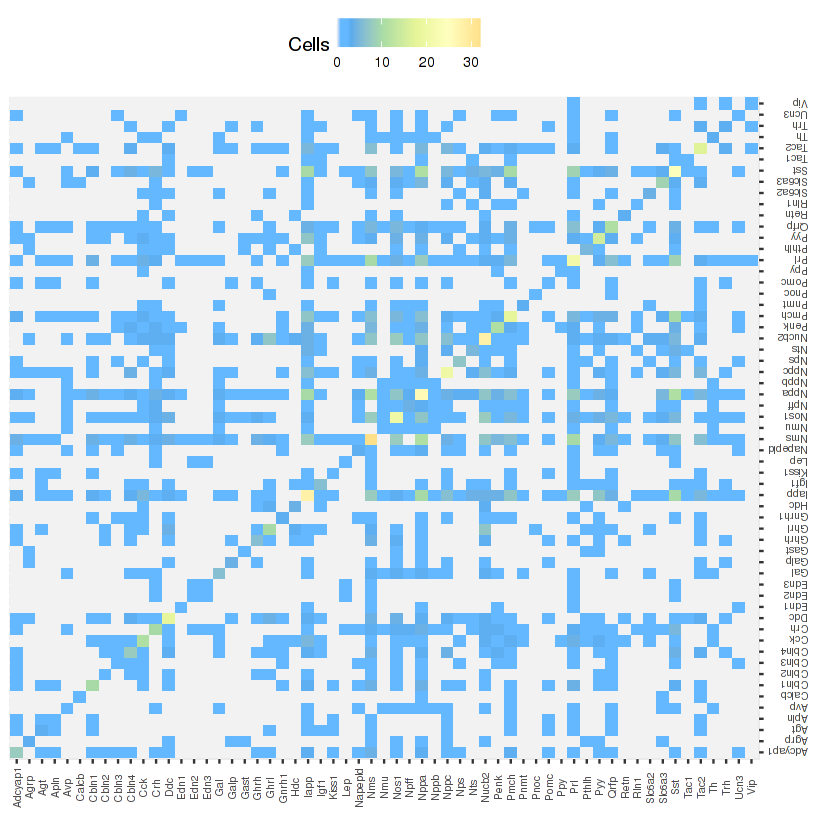

In [52]:
new_list=c()
for(i in c(1:num)){
    new_list=c(new_list,rep(rownames(new_mat)[i],num))
}
dat2$Var1_name=rep(rownames(new_mat),num)
dat2$Var2_name=(new_list)

g=ggplot(dat2,aes(Var1_name, Var2_name)) +
    geom_tile(aes(fill = value)) + 
    labs(x = "", y = "", fill="Cells") +
    geom_text(data=subset(dat2, value>0 & as.numeric(Var1)>=as.numeric(Var2)), aes(label = value), size=1.8,angle = 90) +
    scale_fill_gradientn(colours = c("grey95",'steelblue1','steelblue1','steelblue1','steelblue2','#ABDDA4','#E6F598','#FFFFBF','#FEE08B'), values = c(0,.1,1), na.value="grey95") +
    theme(legend.position="top") +
    guides(colour = guide_legend(reverse=T)) +
    theme(axis.text.x = element_text(angle = 90, vjust=.5, size=6))+
    theme(axis.text.y = element_text(size=6, angle = 180))+
    scale_y_discrete(position = "right")
ggsave("Heatmap_Naresh_old", plot=g, device="png", width = 10, height = 10, units = c("cm"), limitsize = TRUE)
g

In [58]:
new_list=c()
for(i in c(1:num)){
    new_list=c(new_list,rep(new_names[i],num))
}

In [59]:
dim(dat2)

[1] 2401    3

In [60]:
dat2$Var1_name=rep(new_names,num)
dat2$Var2_name=(new_list)

In [ ]:
mycols=c("steelblue2",'darkorchid1','deeppink','aquamarine','chocolate1','gold','darkgreen',"blue3")

In [ ]:
g=ggplot(dat2,aes(Var1_name, Var2_name)) +
    geom_tile(aes(fill = value)) + 
    labs(x = "", y = "", fill="Cells") +
    geom_text(data=subset(dat2, value>0 & as.numeric(Var1)>=as.numeric(Var2)), aes(label = value), size=1.8,angle = 90) +
    scale_fill_gradientn(colours = c("grey95",'steelblue1','steelblue1','steelblue1','steelblue2','#ABDDA4','#E6F598','#FFFFBF','#FEE08B'), values = c(0,.1,1), na.value="grey95") +
    theme(legend.position="top") +
    guides(colour = guide_legend(reverse=T)) +
    theme(axis.text.x = element_text(angle = 90, vjust=.5, size=6))+
    theme(axis.text.y = element_text(size=6, angle = 180))+
    scale_y_discrete(position = "right")
ggsave("Heatmap_spectral250", plot=g, device="png", width = 10, height = 11, units = c("cm"), limitsize = TRUE)
g

In [ ]:
#scale_fill_gradientn(colours = c("grey95",'steelblue1','steelblue1','steelblue2','#66C2A5','#ABDDA4','#E6F598','#FFFFBF','#FEE08B','#FDAE61','#F46D43','#D53E4F'), values = c(0,.1,1), na.value="grey95") +


In [ ]:
colnames(data_df)=marker_names_ordered
rownames(data_df)=cell_list
write.csv(data_df, "FPKM-NP.csv")

In [ ]:
cell_list=colnames(fpkm_data_np)
total_fpkm=c()
for(a in c(1:117)){
  sum1=sum(fpkm_data_np[,a])
  total_fpkm=c(total_fpkm, sum1)
}

In [ ]:
data_df=data.frame(rep(0,117))
i=1
for(a in marker_genes_ordered){
    list=fpkm_data_np[which(fData$tracking_id==a),]   
    data_df[,i]=t(list)
    i=i+1
}
data_df[data_df <.1] <- 0 

In [ ]:
write.csv(data_df, "FPKM-NP_withcutoff.csv")

In [ ]:
neuropeptides_total=c()
for(a in c(1:117)){
  sum2=sum(data_df[a,]>=1)
  neuropeptides_total=c(neuropeptides_total,sum2)
}

In [ ]:
df2=data.frame(cell_list,neuropeptides_total)

In [ ]:
freq=hist(neuropeptides_total,breaks=16)
freq$counts

In [ ]:
data_df_sorted=data.frame(matrix(NA, nrow = 117, ncol = 66))
for(a in c(1:117)){
  new=data_df[a,]
  new_sorted=sort(new)
  data_df_sorted[a,]=new_sorted
}

In [ ]:
data_df_sorted

In [ ]:
which(neuropeptides_total==0)

In [ ]:
#colSums(data_df_sorted)

In [ ]:
#This range needs to be changed based on the max # of neuropeptides expressed in a cell
np_expression_per_cell=data_df_sorted[,-c(1:58)]
np_expression_per_cell=np_expression_per_cell[,c(8:1)]

In [ ]:
np_expression_per_cell

In [ ]:
sum_list=c()
for(a in c(1:117)){
  sum_list=c(sum_list,sum(np_expression_per_cell[a,]))
}
np_expression_per_cell$Sum=sum_list

In [ ]:
#Order cells
ontp=order(neuropeptides_total,sum_list)
np_exprs_ordered1=np_expression_per_cell[ontp,]
np_exprs_ordered=np_exprs_ordered1[-c(1:length(which(sum_list==0))),]
order_list=rownames(np_exprs_ordered)
np_exprs_ordered$order=c(1:(117-length(which(sum_list==0))))
np_exprs_ordered$Sum=NULL

In [ ]:
npe1=melt(np_exprs_ordered, id.var="order")

In [ ]:
#This makes log scaled bar graph
g2=ggplot(npe1, aes(x=order, y=value, fill=variable)) + 
  geom_bar(stat = "identity") +
  scale_fill_manual(values=mycols)+
  monocle_theme_opts()+
  ylab("FPKM")+
  xlab("Neurons")+
  scale_x_continuous(expand = c(0,0), breaks = c(1:104))+
  scale_y_continuous(limits = c(0,NA),expand = c(0,0))+
  theme(
    axis.text.x = element_blank())

In [ ]:
sum_list_ordered1=sum_list[ontp]

In [ ]:
sum_list_ordered=sum_list_ordered1[-(1:length(which(sum_list_ordered1==0)))]
dim(np_exprs_ordered)

In [ ]:
sum_list_ordered

In [ ]:
np_exprs_percent=data.frame(matrix(NA, nrow = 107, ncol = 8))

In [ ]:
#Removed if statement bc it was breaking for unknown reason and it was never true. Manually test that sum_list_ordered is not zero in future applications
for(a in c(1:107)){
  #if(sum_list_ordered[a]==0){
  #  np_exprs_percent[a,]=rep(0,8)
  #}
  #else{
    np_exprs_percent[a,1:8]=np_exprs_ordered[a,1:8]/sum_list_ordered[a]
  #}
}

In [ ]:

np_exprs_percent$order=c(1:107)
npe2=melt(np_exprs_percent, id.var="order")

In [ ]:
#This makes percentage based bar-graph
g3=ggplot(npe2, aes(x=order, y=value, fill=variable)) + 
  geom_bar(stat = "identity") +
  scale_fill_manual(values=rev(mycols))+
  monocle_theme_opts()+
  ylab("Percent of total FPKM")+
  xlab("Neurons")+
  scale_y_continuous(expand = c(0,0))+
  scale_x_continuous(expand = c(0,0), breaks = c(1:107))+
  theme(
    axis.text.x = element_blank())

In [ ]:
length(which(np_exprs_ordered$X60!=0))


In [ ]:
np_exprs_ordered

In [ ]:
g2

Warning message:
“Removed 144 rows containing missing values (position_stack).”

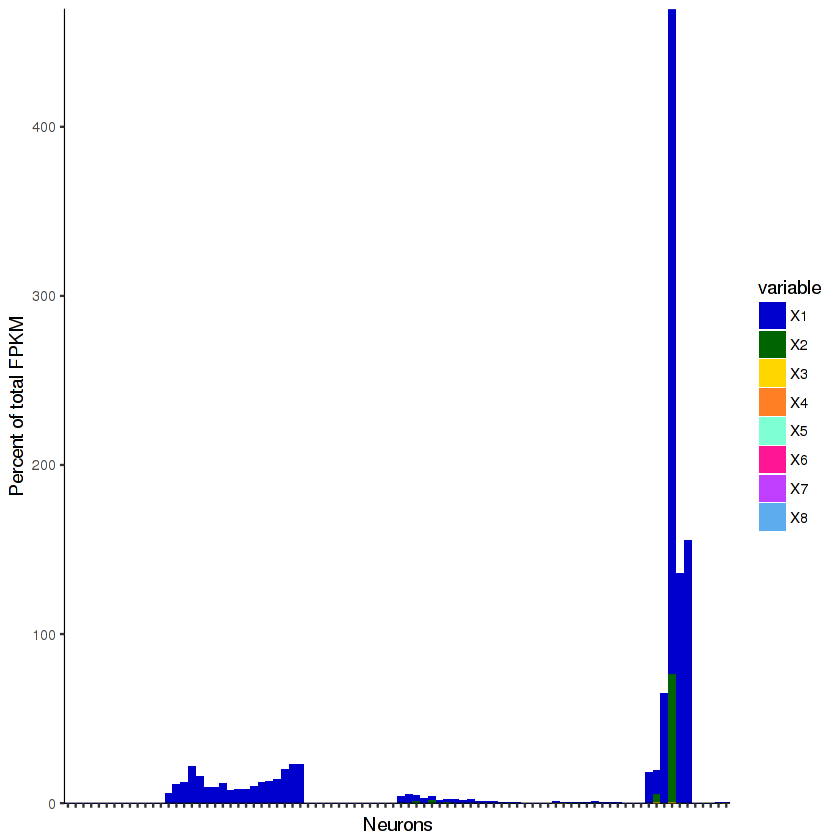

In [139]:
g3

In [140]:
g_top=ggplot(npe1, aes(x=order, y=value, fill=variable, width=.75)) + 
geom_bar(stat = "identity") +
scale_fill_manual(values=mycols)+
monocle_theme_opts()+
ylab("FPKM")+
xlab("Neurons")+
scale_x_continuous(expand = c(0,0), breaks = c(1:124))+
scale_y_continuous(limits = c(0,NA),expand = c(0,0))+
theme(
  axis.text.x = element_blank()) +
coord_cartesian(ylim=c(0, 1000))

In [141]:
g_bottom=ggplot(npe1, aes(x=order, y=value, fill=variable, width=.75)) + 
geom_bar(stat = "identity") +
scale_fill_manual(values=mycols)+
monocle_theme_opts()+
ylab("FPKM")+
xlab("Neurons")+
scale_x_continuous(expand = c(0,0), breaks = c(1:124))+
scale_y_continuous(limits = c(0,NA),expand = c(0,0))+
theme(
  axis.text.x = element_blank()) +
coord_cartesian(ylim=c(1000,218132.8391))

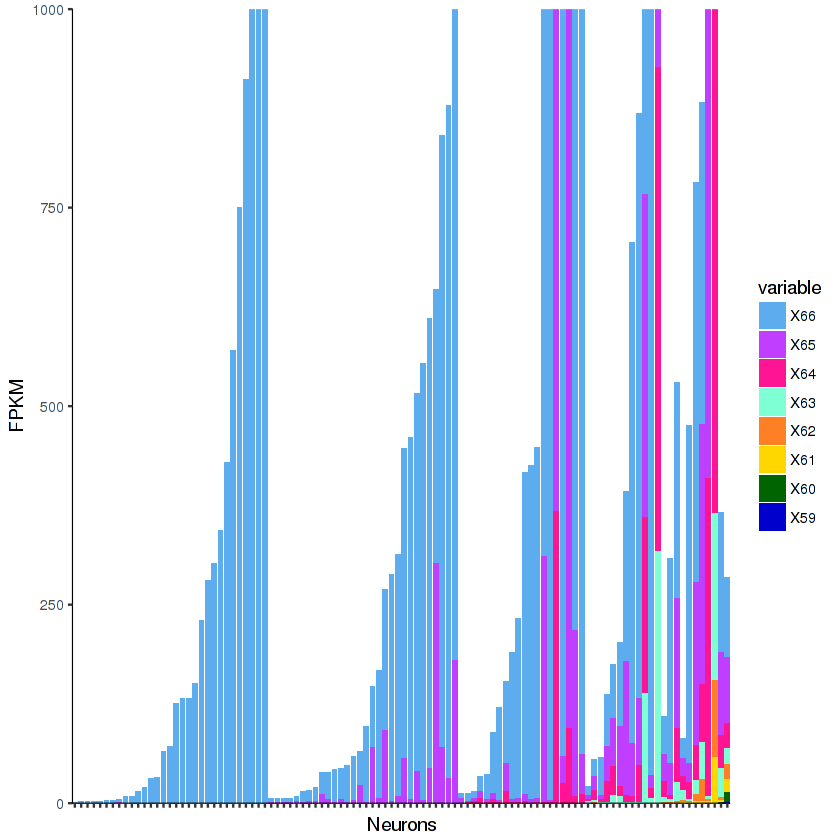

In [142]:
g_top

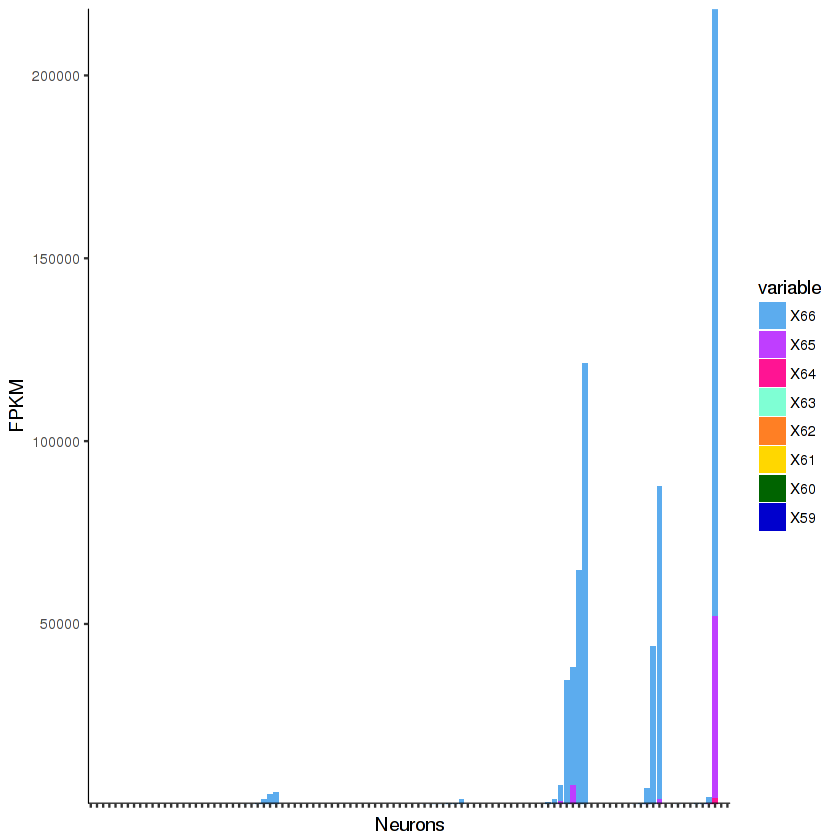

In [143]:
g_bottom

In [171]:
ggsave("g_top", plot=g_top, device="png", width = 12, height = 5, units = c("cm"), limitsize = TRUE)
ggsave("g_bottom", plot=g_bottom, device="png", width = 12, height = 5, units = c("cm"), limitsize = TRUE)

In [86]:
cds_neurons

CellDataSet (storageMode: lockedEnvironment)
assayData: 52545 features, 124 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: q4_0 q6_0 ... q468_0 (124 total)
  varLabels: sample_id file ... Subtype (9 total)
  varMetadata: labelDescription
featureData
  featureNames: ENSMUSG00000000001.4 ENSMUSG00000000003.15 ...
    ENSMUSG00000114968.1 (52545 total)
  fvarLabels: tracking_id class_code ... length (8 total)
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

In [83]:
tSNE_dim_coords <- reducedDimA(cds_neurons)
#tsne_1=tSNE_dim_coords[1,]
#tsne_2=tSNE_dim_coords[2,]
tSNE_dim_coords

<0 x 0 matrix>

In [84]:
monocle_theme_opts <- function()
{
    theme(strip.background = element_rect(colour = 'white', fill = 'white')) +
    theme(panel.border = element_blank()) +
    theme(axis.line.x = element_line(size=0.25, color="black")) +
    theme(axis.line.y = element_line(size=0.25, color="black")) +
    theme(panel.grid.minor.x = element_blank(), panel.grid.minor.y = element_blank()) +
    theme(panel.grid.major.x = element_blank(), panel.grid.major.y = element_blank()) + 
    theme(panel.background = element_rect(fill='white')) +
    theme(legend.key=element_blank())
}


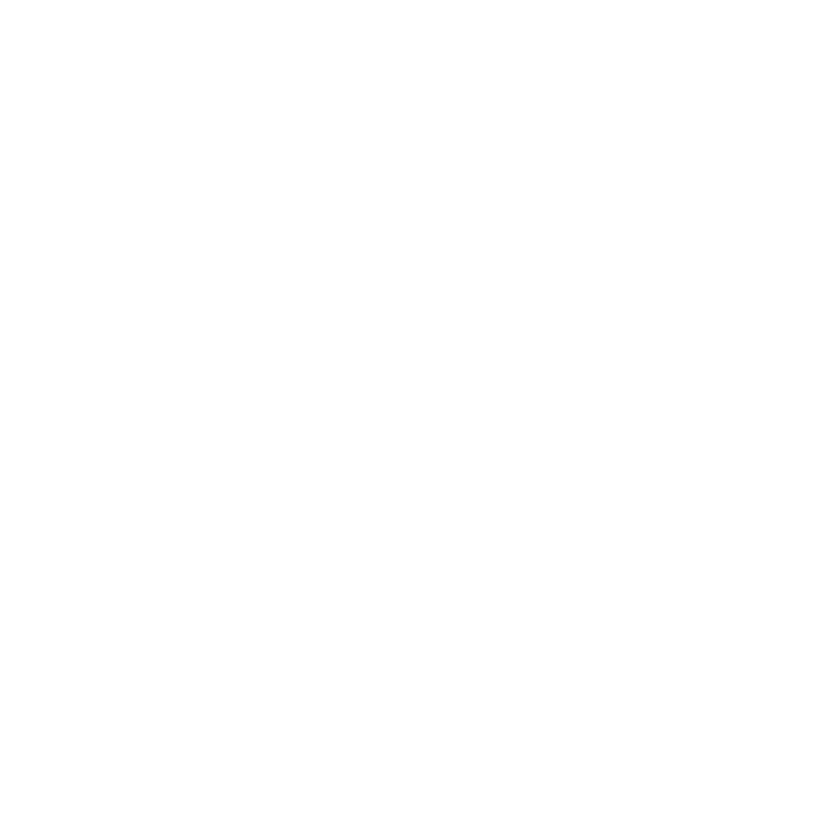

In [85]:
for(i in c(1)){
g=ggplot(data=data_df, aes(x = tsne_1, y = tsne_2))+geom_point(aes(colour=as.logical(data_df[,i])), size=3)+
    scale_color_manual(values = c("#C7C7C7", "#FF6A6A" )) +
    monocle_theme_opts() + 
    ggtitle(marker_names_ordered[i]) +
    xlab(paste("Component", 1)) + 
    ylab(paste("Component", 2)) +
    #guides(color = guide_legend(label.position = "top")) +
    theme(legend.key = element_blank()) +
    theme(panel.background = element_rect(fill='white')) +
    theme(text = element_text(size = 15)) +
    theme(legend.position="none") +
    theme(plot.title = element_text(hjust = 0.5))
    #ggsave(marker_names_ordered[i], plot=g, device="png", width = 5, height = 5, units = c("in"), limitsize = TRUE)
    }
g